<h1> 1.Análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.</h1>

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [492]:
#Carga y lectura de datos en pyhton
DatosTitanic = pd.read_csv('./Titanic-Dataset.csv')

In [493]:
#Identificar cantidad de registros y columnas
DatosTitanic.shape

(891, 12)

In [494]:
#Mostrar las primeras 10 filas
DatosTitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [495]:
#Descripcion del dataset
DatosTitanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [496]:
#Información del dataset
DatosTitanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


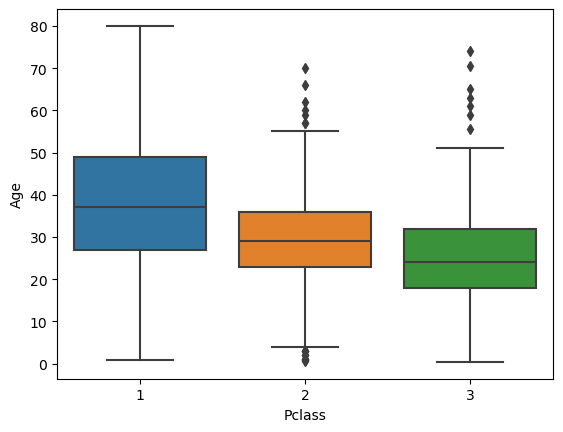

In [497]:
#Boxplot para identificar valores atipicos en Edad
sns.boxplot(x='Pclass', y='Age', data=DatosTitanic)
plt.show()

<h1> 2.Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.</h1>

In [498]:
#identificar valores faltantes
DatosTitanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [499]:
#Llenar valores faltantes de Age con la mediana
DatosTitanic['Age']=DatosTitanic['Age'].fillna(DatosTitanic['Age'].median())
DatosTitanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [500]:
#Llenar valores faltantes de Embarked con la moda
DatosTitanic['Embarked'].fillna(DatosTitanic['Embarked'].mode()[0], inplace=True)
DatosTitanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [501]:
#Llenar valores faltantes de Cabin con N/A
#DatosTitanic['Cabin']=DatosTitanic['Cabin'].fillna("N/A")
#DatosTitanic.isna().sum()
DatosTitanic.drop(columns=['Cabin'], inplace=True)

In [502]:
#Visualizar preprocesamiento
DatosTitanic['Survived']=DatosTitanic['Survived'].map({0:'N',1:'S'})
DatosTitanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,N,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,S,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,S,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,S,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,N,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,N,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,Q
6,7,N,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,N,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,S,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,S,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [503]:
#Se convierte variables a numericas
DatosTitanic['Sex']=DatosTitanic['Sex'].map({'male': 0, 'female': 1})
DatosTitanic=pd.get_dummies(DatosTitanic, columns=['Embarked'], drop_first=True)

<h1>3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.</h1>

In [504]:
#Seleccion de caracteristicas usando SelectKBest
X = DatosTitanic.drop(['Survived', 'Name', 'Ticket', 'PassengerId'], axis=1)
y = DatosTitanic['Survived']
select_kbest = SelectKBest(score_func=f_classif, k=5)
X_new = select_kbest.fit_transform(X, y)
selected_features = X.columns[select_kbest.get_support()]
print("Selected features using SelectKBest:", selected_features)

Selected features using SelectKBest: Index(['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked_S'], dtype='object')


<h1>4. Dividir el dataset en Train y Test para evaluar correctamente el 
modelo.</h1>

In [505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<H1>5.Entrenar el modelo configurando los diferentes 
hiperparámetros.</H1>

[Text(0.534698513215859, 0.9772727272727273, 'x[1] <= 0.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.22270099118942732, 0.9318181818181818, 'x[2] <= 6.5\ngini = 0.303\nsamples = 467\nvalue = [380, 87]'),
 Text(0.07312775330396476, 0.8863636363636364, 'x[3] <= 2.5\ngini = 0.434\nsamples = 22\nvalue = [7, 15]'),
 Text(0.06607929515418502, 0.8409090909090909, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.0801762114537445, 0.8409090909090909, 'x[2] <= 2.5\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.07312775330396476, 0.7954545454545454, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.08722466960352424, 0.7954545454545454, 'x[5] <= 31.331\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.0801762114537445, 0.75, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.09427312775330396, 0.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3722742290748899, 0.8863636363636364, 'x[0] <= 1.5\ngini = 0.271\nsamples = 445\nvalue = [373, 72]'),
 Text(0.12

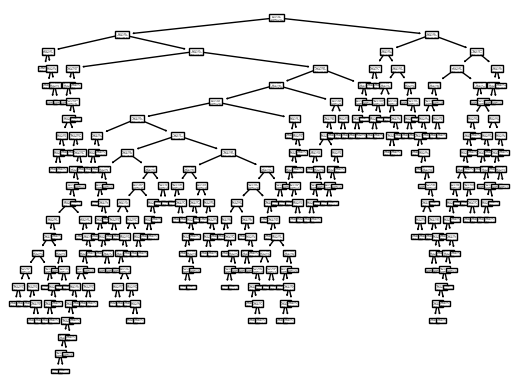

In [506]:
arbolDecision = DecisionTreeClassifier()
arbolDecision.fit(X_train, y_train)
plot_tree(arbolDecision)

In [507]:
predicciones = arbolDecision.predict(X_test)

<h1>6.Evaluar el desempeño del modelo en el conjunto de Test con 
métricas como precisión, recall, F1-score, etc.</h1>

In [508]:
# Desempeño del Arbol de desiciones
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           N       0.82      0.80      0.81       105
           S       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [509]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.776536312849162

<H1>7.Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.</H1>

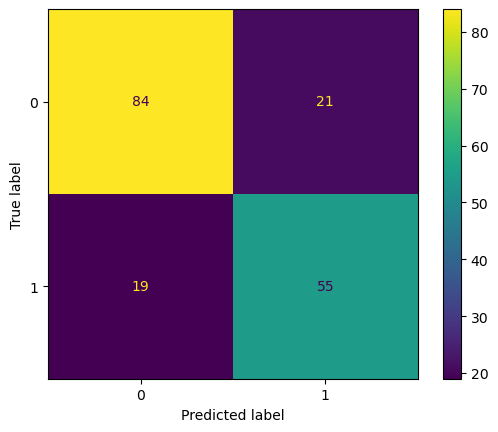

In [510]:
cm=confusion_matrix(y_test,predicciones)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

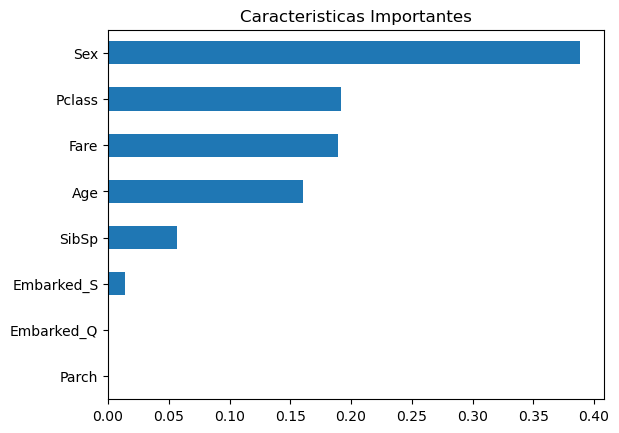

In [511]:
importances = pd.Series(best_model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Caracteristicas Importantes')
plt.show()

<H1>8. Interpretar, analizar y documentar los resultados obtenidos</H1>

Luego del analisis de la importancia de las caracteristicas del modelo de arbol de decision, se observa que las variables Sex, Pclass, y Age son significativas. 
Por ende se puede deducir que:
<h6>Sexo(Sex):</h6> Las mujeres tenian una mayor probabilidad de sobrevivir. 
Los resultados confirmaron que el sexo era una característica relevante. Las mujeres tenian mas probabilidades de sobrevivir, probablemente debido a la politica de "mujeres y niños primero".
<h6>Clase de pasaje(PClass):</h6> La clase tenia un impacto significativo en la probabilidad de supervivencia, con los pasajeros de primera clase en una posición mucho mejor.
<h6>Edad(Age):</h6> Los más jóvenes tenían una mayor tasa de supervivencia, en la mayoria los niños tenian mas probabilidades de sobrevivir.

De este modo considero que la variable sexo es la mas influyente en las predicciones, la variable pclass y fare son significativas y la variable edad tiene una influencia media y las demas tienen poca importancia.

<h6>Preisión:</h6> la proporcion de verdaderos positivos sobre el total de positivos predichos.Este modelo es mas preciso para predecir que alguien no sobrevicio co 0.82 en comapración con la predicción que alguien sobrevivio con 0.73.
<h6>Recall:</h6> La proporcion de verdaderos positivos sobre el total de positivos reales, el modelo tiene un mejor desempeño al identificar correctamente a los que no sobrevivieron con un 0.80 que a los que sobrevivieron con 0.76.
<h6>F1-Score:</h6> La media armonica de la precisión y el recall, proprorciona un balacnce entre ambas. Es levemente mejor para los que no sobrevivieron con 0.81 en comparacion con los que sobrevivieron con 0.74.

<h6>La matriz de confusión:</h6>El modelo tiene 84 verdaderos negativos y 56 verdaderos positivos.
Hay 21 falsos positivos y 18 falsos negativos